In [ ]:
"""
## Project Summary

This project is a simple stock price prediction tool for the S&P 500 (SPX). The main goal was to predict whether the stock price will go up or down the next day using historical data and machine learning.

### Steps taken in this project:

1. **Data Collection:** Downloaded daily historical prices for the S&P 500, including open, close, high, low, and volume.

2. **Data Preparation:** 
   - Cleaned the data and created new features, such as whether the price goes up the next day ("Target").
   - Added moving averages and other trend indicators to help the model learn.

3. **Model Building:** 
   - Used a Random Forest, a machine learning model, to predict if the stock price will go up the next day.
   - Trained the model using past data, and tested it on unseen (future) data to see how well it works.

4. **Backtesting:**
   - Simulated how the model would perform if it "traded" on historical data.
   - Used simple accuracy and precision metrics to judge if predictions were useful.

5. **Results:**
   - The model correctly predicts upward price movement about 51-55% of the time when it decides to "trade."
   - By adjusting the confidence threshold, the model can trade less frequently but with higher accuracy.

This project is a starting point for exploring stock prediction with machine learning. It can be improved by adding more features (news, other markets) or using finer-grained data (hourly prices).
"""


In [72]:
import yfinance as yf 


In [73]:
sp500 = yf.Ticker("^GSPC") # the gspc is an S&P index.

sp500 = sp500.history(period="max") # queries through the data since the index has been created

In [74]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0


In [75]:
# from the chart above, with the values you can tell how the prices will act
# wont be using the stock splits and the dividends though

In [76]:
sp500.index # the index is just the date time on the left.

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-11-03 00:00:00-05:00', '2025-11-04 00:00:00-05:00',
               '2025-11-05 00:00:00-05:00', '2025-11-06 00:00:00-05:00',
               '2025-11-07 00:00:00-05:00', '2025-11-10 00:00:00-05:00',
               '2025-11-11 00:00:00-05:00', '2025-11-12 00:00:00-05:00',
               '2025-11-13 00:00:00-05:00', '2025-11-14 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24586, freq=None)

<Axes: xlabel='Date'>

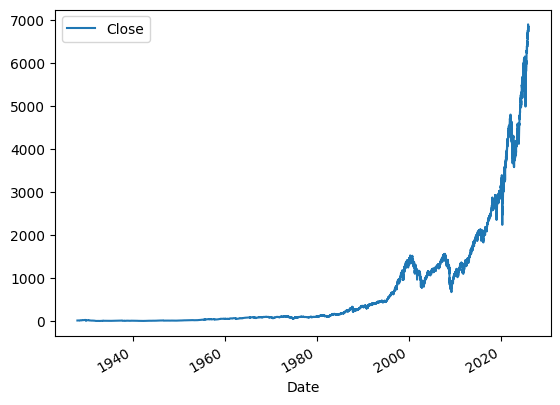

In [77]:
# CLEANING AND ORGANIZING 

sp500.plot.line(y="Close", use_index=True)
# showing the trading dates: x and the closing dates as well : y

In [78]:
# setting up for training and prediction : 

# in summary for this part: on days that the stock does go up, can we actually predict that they will go up for that day
# in a nutshell, will the stock go up or down for the day?

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [79]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234


In [80]:
# in the chart above, the prices are shifted back one day. We now have a column that shows tomorrows price.

# now based on tomorrows price, we can set up a target, is tomorrows price > today's price?   :: 

In [81]:
sp500["Target"] = (sp500["Tomorrow"] > sp500 ["Close"]).astype(int)

In [82]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922,1
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234,0


In [83]:
# We can now see that in the chart, we now have a target column, that is a 1 when the price went up, and a 0 if the price went down.

In [84]:
# there is also a lot of historical data in this dataset, the issue is that, if we go too far back in the market : 
# the market could've shifted and not useful for predictions. 
# so, we will be removing everything before the year 1990. 

In [85]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500
# we will now see dates after 01.01.1990

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922,1
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234,0


In [86]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# --- 1. FEATURE ENGINEERING (Creating new columns) ---

# We must use the correct, lowercase names from yfinance
predictors = ["Close", "Volume", "Open", "High", "Low"] 
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

# This creates the final, full list of predictors
predictors += new_predictors

# --- 2. DATA CLEANING (Must be done BEFORE splitting) ---
# This fixes the NaN and Inf errors
sp500 = sp500.replace([np.inf, -np.inf], np.nan)
sp500 = sp500.dropna()

# --- 3. DATA SPLITTING (Now that data is clean) ---
train = sp500.iloc[:-100] # always make sure to split your dataset into training and testing
test = sp500.iloc[-100:]
# for the training set, all of the rows EXCEPT the last 100 rows 
# for the testing set, the last 100 rows for this set

# --- 4. MODEL TRAINING (With your comments and the fix) ---
# finally, getting to training : 

# we will be using a random forest classifier, but what is a random forest classifier?
# It's like making a big decision by asking a large crowd of experts for their individual opinions and then choosing the answer that most of them voted for.

# its also resistant to overfitting (training data too well, including the noise, causing it to perform poorly on new, unseen data)
#another thing is that most stock trends are NON _ LINEAR! 

# our random forest just picks up NON LINEAR relationships 

# This is the corrected model, with class_weight="balanced" to fix the "all 0s" problem
model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1, class_weight="balanced")
# n estimators is the # of decision trees we want to train, the higher it is, generally the better the accuracy is
# min_sample_split is just used to protect us from overfitting,
# random_state is just randomization, if running the model twice, the numbers outputted will be in a predictable sequence

# We fit the model using our full list of predictors (original 5 + all the new ones)
model.fit(train[predictors], train["Target"]) 
# use the predictor columns to predict the target.

print("Model trained successfully!")

Model trained successfully!


In [87]:
# Feature Engineering - Create rolling averages
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    # FIXED: Use shift(1) to avoid look-ahead bias - don't use future data
    rolling_averages = sp500.shift(1).rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    # FIXED: Count how many days in the past 'horizon' days the stock went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

predictors += new_predictors

# Clean data - remove NaN and Inf values
sp500 = sp500.replace([np.inf, -np.inf], np.nan)
sp500 = sp500.dropna()

# FIXED: Remove the last row before splitting (has NaN in Tomorrow)
sp500 = sp500[:-1].copy()

# Split data - FIXED: Use more data for testing (500 instead of 100)
train = sp500.iloc[:-500]
test = sp500.iloc[-500:]

# FIXED: Better model parameters to prevent all 0s
model = RandomForestClassifier(
    n_estimators=200,        # More trees for stability
    min_samples_split=50,    
    random_state=1,
    class_weight="balanced",
    max_depth=10              # Prevent overfitting
)

In [88]:
import pandas as pd
preds = pd.Series(preds, index=test.index)
preds # this is much better since its a series now

Date
2023-11-15 00:00:00-05:00    NaN
2023-11-16 00:00:00-05:00    0.0
2023-11-17 00:00:00-05:00    0.0
2023-11-20 00:00:00-05:00    1.0
2023-11-21 00:00:00-05:00    1.0
                            ... 
2025-11-06 00:00:00-05:00    0.0
2025-11-07 00:00:00-05:00    0.0
2025-11-10 00:00:00-05:00    0.0
2025-11-11 00:00:00-05:00    0.0
2025-11-12 00:00:00-05:00    NaN
Length: 500, dtype: float64

In [89]:
print("--- DEBUG INFO ---")
print(f"Number of predictors being used: {len(predictors)}")
print("\nBalance of 0s and 1s in your TRAINING data:")
print(train["Target"].value_counts(normalize=True))
print("------------------")

--- DEBUG INFO ---
Number of predictors being used: 25

Balance of 0s and 1s in your TRAINING data:
Target
1    0.533211
0    0.466789
Name: proportion, dtype: float64
------------------


In [91]:
# --- 1. TRAIN THE MODEL FIRST ---
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=50,
    random_state=1,
    class_weight="balanced",
    max_depth=10
)

# Fit the model using training data
model.fit(train[predictors], train["Target"])
print("Model trained successfully!")

# --- 2. NOW MAKE PREDICTIONS ---
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision
precision = precision_score(test["Target"], preds, zero_division=0)
print(f"Precision Score: {precision:.4f}")

# Show more detailed metrics
print(f"\nPrediction distribution:")
print(f"Predicted 0s: {(preds == 0).sum()}")
print(f"Predicted 1s: {(preds == 1).sum()}")

# Calculate accuracy
accuracy = (preds == test["Target"]).mean()
print(f"\nAccuracy: {accuracy:.4f}")

Model trained successfully!
Precision Score: 0.6250

Prediction distribution:
Predicted 0s: 484
Predicted 1s: 16

Accuracy: 0.4260


<Axes: xlabel='Date'>

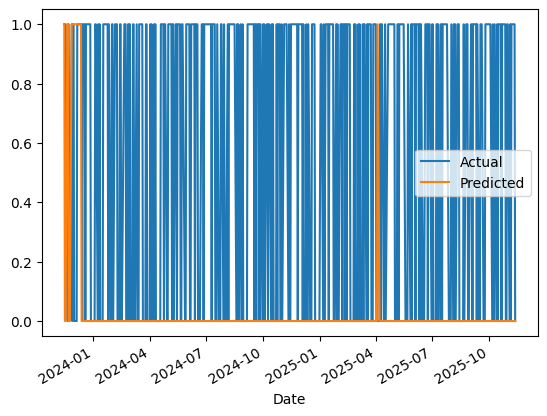

In [93]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.columns = ["Actual", "Predicted"]  # Add this line
combined.plot()

In [ ]:
# doing back testing now : 
# ( a method of evaluating a model's performance by applying it to historical data to simulate how it would have performed in the past)

def predict(train, test, predictors, model): # to enable backtesting we should wrap everyting up into one function
    model.fit(train[predictors], train["Target"]) # again using the predictions and the targets
    preds = model.predict(test[predictors]) 
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined # combines everything together


In [95]:
# write a backtest function : 


def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

# start value is the certain amount of data to train your first model 
# every trading uyear has about 250 days, so 2500 is about 10 years of data. 
# training a model on each year and then moving on 

    for i in range(start, data.shape[0], step): # looping accorss our data year by year 
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy() # splitting up training and test data
        predictions = predict(train, test, predictors, model) 
        all_predictions.append(predictions) 
    
    return pd.concat(all_predictions) # put all the predictions together and combine
    

In [96]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts() 


Predictions
0    2601
1    1933
Name: count, dtype: int64

In [ ]:
# as you can see above, we predicted that the market woudld go down for 2601 days and up for 1933 days. 

In [98]:
precision_score(predictions["Target"], predictions["Predictions"]) # rerun the percision socre

0.5519917227108122

In [ ]:
# in around 4500 trading days we were 55% accurate on the market going up.

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

# In the days we were looking at, went up 54 percent of days and down 45 percent of days
# performed pretty bad. If you had bought and sold everyday we would be better off than using this algorithm.

Target
1    0.544332
0    0.455668
Name: count, dtype: float64

In [101]:
# adding more predictors to our model to add more accuracy : 
horizons = [2,5,60,250,1000]
# horizons on which we want to look at rolling means, so calculate the mean closing price on :
# the last 2 days, the last trading week which is 5 days, the last 2 monnths which is 60, the last year and the last 4 years. 
# then find the ratio in todays closing price and the closing price in those periods 

new_predictors = [] # holds some of the new columns were going to create


for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # calculate a rolling average against that horizon and take the mean
    
    ratio_column = f"Close_Ratio_{horizon}" # new column close ratio 
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # ratio of toadys close divided by average close in 2 days, we keep going for 5, 60, 250 
    
    trend_column = f"Trend_{horizon}" # number of days the stock price actually went up 
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # 
    
    new_predictors+= [ratio_column, trend_column]


In [ ]:
sp500

# dataset with our newly created columns 
# there is also going to be a lot of NaN's


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,close_ratio_2,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,0.0,0.0,955.400024,1,1.000431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,0.0,0.0,974.770020,1,1.001972,...,1.001972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,0.0,0.0,971.679993,0,1.010035,...,1.010035,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,0.0,0.0,976.770020,1,0.998412,...,0.998412,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,0.0,0.0,973.099976,0,1.002612,...,1.002612,1.0,1.011095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06 00:00:00-05:00,6787.589844,6796.680176,6707.509766,6720.319824,6051900000,0.0,0.0,6728.799805,1,0.994379,...,0.994379,1.0,0.988854,3.0,1.013914,35.0,1.102279,144.0,1.363429,528.0
2025-11-07 00:00:00-05:00,6696.180176,6730.109863,6631.439941,6728.799805,5926070000,0.0,0.0,6832.430176,1,1.000631,...,1.000631,1.0,0.993359,3.0,1.014529,35.0,1.103123,144.0,1.364583,528.0
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1,1.007642,...,1.007642,2.0,1.009240,3.0,1.029164,36.0,1.119498,144.0,1.384996,529.0


In [104]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,close_ratio_2,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
2001-11-20 00:00:00-05:00,1151.060059,1152.449951,1142.170044,1142.660034,1330200000,0.0,0.0,1137.030029,0,0.996338,...,0.996338,1.0,0.999559,3.0,1.048050,29.0,0.939880,120.0,0.910431,504.0
2001-11-21 00:00:00-05:00,1142.660034,1142.660034,1129.780029,1137.030029,1029300000,0.0,0.0,1150.339966,1,0.997530,...,0.997530,0.0,0.995362,2.0,1.043337,28.0,0.935960,120.0,0.905814,503.0
2001-11-23 00:00:00-05:00,1137.030029,1151.050049,1135.900024,1150.339966,410300000,0.0,0.0,1157.420044,1,1.005819,...,1.005819,1.0,1.005588,2.0,1.055740,29.0,0.947516,121.0,0.916289,503.0
2001-11-26 00:00:00-05:00,1150.339966,1157.880005,1146.170044,1157.420044,1129800000,0.0,0.0,1149.500000,0,1.003068,...,1.003068,2.0,1.008467,3.0,1.062685,29.0,0.953945,121.0,0.921792,504.0
2001-11-27 00:00:00-05:00,1157.420044,1163.380005,1140.810059,1149.500000,1288000000,0.0,0.0,1128.520020,0,0.996567,...,0.996567,1.0,1.001839,2.0,1.055893,29.0,0.947957,121.0,0.915359,503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06 00:00:00-05:00,6787.589844,6796.680176,6707.509766,6720.319824,6051900000,0.0,0.0,6728.799805,1,0.994379,...,0.994379,1.0,0.988854,3.0,1.013914,35.0,1.102279,144.0,1.363429,528.0
2025-11-07 00:00:00-05:00,6696.180176,6730.109863,6631.439941,6728.799805,5926070000,0.0,0.0,6832.430176,1,1.000631,...,1.000631,1.0,0.993359,3.0,1.014529,35.0,1.103123,144.0,1.364583,528.0
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1,1.007642,...,1.007642,2.0,1.009240,3.0,1.029164,36.0,1.119498,144.0,1.384996,529.0


In [105]:
# improving our model : 


model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [106]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # probability of it being 0 or 1 
    preds[preds >=.6] = 1
    preds[preds <.6] = 0 # model will be more confident that the price will go up reduce the number of trading days and increase the chance of the price will go up those days 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [107]:
predictions = backtest(sp500, model, new_predictors) # run the backtest again

In [ ]:
predictions["Predictions"].value_counts() #run this again and see 

# notice how there are fewer days that we predict that the price will go up due to the threshold we set

Predictions
0.0    3033
1.0     501
Name: count, dtype: int64

In [109]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5169660678642715

In [ ]:
# we can now see that when we buy a stock, or when the model predicts the price will go up, 51 percent of the time it will actually go up. 

# Of the extension ideas, the simplest one to implement here is to focus on a key sector—let’s add a tech sector component (e.g., use a major tech ETF like QQQ as an additional predictor).

# Downloading QQQ (NASDAQ 100 ETF) historical data and merging its returns as a new feature:

import yfinance as yf

# Download QQQ data for the same date range as S&P500 (use timezone-aware DatetimeIndex)
qqq = yf.download("QQQ", start=sp500.index.min().date(), end=sp500.index.max().date(), auto_adjust=True)
qqq = qqq.tz_localize("America/New_York") if qqq.index.tz is None else qqq
qqq = qqq.reindex(sp500.index) # align on trading days

# Calculate QQQ daily returns
sp500["QQQ_Returns"] = qqq["Close"].pct_change()

# Add the new feature to our predictors list
new_predictors_with_qqq = new_predictors + ["QQQ_Returns"]

# Drop any new missing values created (eg at the start)
sp500 = sp500.dropna(subset=new_predictors_with_qqq + ["Target"])

# Redo the backtest using the new predictors list with QQQ returns
predictions_qqq = backtest(sp500, model, new_predictors_with_qqq)

# Evaluate performance
print("Model precision with QQQ sector feature:")
print(precision_score(predictions_qqq["Target"], predictions_qqq["Predictions"]))



In [113]:
# Of the extension ideas, the simplest one to implement here is to focus on a key sector—let’s add a tech sector component (e.g., use a major tech ETF like QQQ as an additional predictor).

# Downloading QQQ (NASDAQ 100 ETF) historical data and merging its returns as a new feature:

import yfinance as yf

# Download QQQ data for the same date range as S&P500 (use timezone-aware DatetimeIndex)
qqq = yf.download("QQQ", start=sp500.index.min().date(), end=sp500.index.max().date(), auto_adjust=True)
qqq = qqq.tz_localize("America/New_York") if qqq.index.tz is None else qqq
qqq = qqq.reindex(sp500.index) # align on trading days

# Calculate QQQ daily returns
sp500["QQQ_Returns"] = qqq["Close"].pct_change()

# Add the new feature to our predictors list
new_predictors_with_qqq = new_predictors + ["QQQ_Returns"]

# Drop any new missing values created (eg at the start)
sp500 = sp500.dropna(subset=new_predictors_with_qqq + ["Target"])

# Redo the backtest using the new predictors list with QQQ returns
predictions_qqq = backtest(sp500, model, new_predictors_with_qqq)

# Evaluate performance
print("Model precision with QQQ sector feature:")
print(precision_score(predictions_qqq["Target"], predictions_qqq["Predictions"]))

[*********************100%***********************]  1 of 1 completed
/var/folders/01/80d8vn6x2r181_nf2g_mwwch0000gn/T/ipykernel_82616/1643157910.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sp500["QQQ_Returns"] = qqq["Close"].pct_change()
/var/folders/01/80d8vn6x2r181_nf2g_mwwch0000gn/T/ipykernel_82616/1643157910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["QQQ_Returns"] = qqq["Close"].pct_change()


Model precision with QQQ sector feature:
0.527027027027027


In [ ]:
"""
##

This means that when we include the QQQ (tech sector ETF) as an additional predictor for S&P 500 returns,
the model correctly predicts whether the S&P 500 will go up the next day about 52.7% of the time. 
A precision score of 0.527 means that, out of all the days the model predicted an increase, 52.7% were actually correct.
In other words, adding the tech sector feature slightly improved the model's precision above random chance (which would be 50%),
but is still only modestly better than a coin flip.

"""